## Summary and Conclusion
1.From the daily time point of view, the number of accidents occurred most frequently in the two time periods of 8:00-9:00 and 17:00-18:00, indicating that the morning and evening peaks are the most accident-prone periods.





2.From the perspective of years, the number of car accidents increased year by year before 2022, which may be related to the gradual increase in the number of cars. However, after 2022, the number of car accidents dropped sharply, which may be due to the change in travel mode after covid. It is possible that people prefer public transportation rather than private cars.




3.From the monthly analysis, the number of accidents is relatively small from March to August each year, and the number of accidents is relatively large from September to February. This may be related to weather conditions and sunshine hours. From September to February, it is the autumn and winter season. Snow and rain lead to poor road conditions. The extension of night time may also be the reason for the high number of accidents.

In [10]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
df = pd.read_csv(r'D:\zhuomianshangdedawu\US_Accidents_March23_sampled_500k\US_Accidents_March23_sampled_500k.csv', encoding='ISO-8859-1')


### Analyze Start_Time and End_Time

In [13]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')#有两千多个都是nat
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
df['Resolution_Time'] = (df['End_Time'] - df['Start_Time']) / pd.Timedelta(hours=1)



In [59]:
resolution_time_severity= df.groupby('Severity')['Resolution_Time'].mean()


In [60]:
#resolution_time_severity.plot(kind='barh', x='Resolution_Time', y='Severity', xlabel='Time(Hours)')

In [61]:
df['hour_of_Accident'] = pd.to_datetime(df['Start_Time'], errors='coerce').dt.hour
hour_count = pd.to_datetime(df['Start_Time']).dt.hour.value_counts().sort_index().reset_index(name='Count')
hour_count.columns = ['Hour', 'Counts']


### Visualize accidents across the hours of the day

<Axes: xlabel='Time Of Day'>

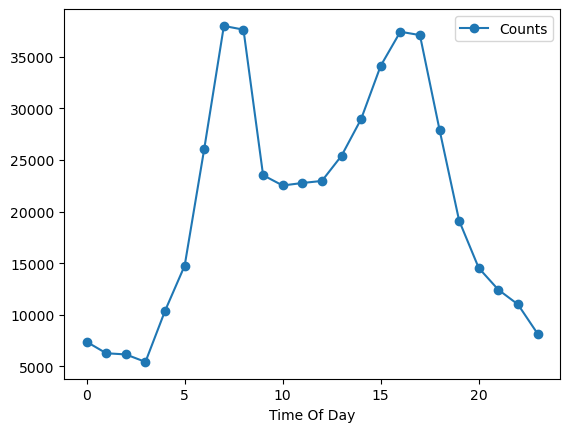

In [62]:
hour_count.plot(kind='line', x='Hour', y='Counts', marker='o', xlabel='Time Of Day')

### Visualize Start Time to derive Year on Year trend

In [63]:
df['Year_Of_Accident'] = pd.to_datetime(df['Start_Time']).dt.year


<Axes: xlabel='Year_Of_Accident', ylabel='Count'>

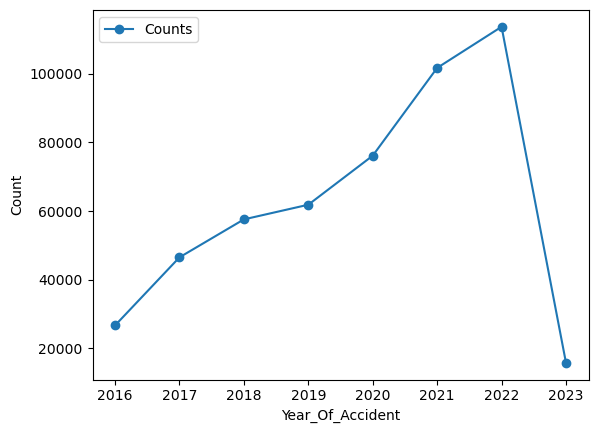

In [64]:
year_counts = df['Year_Of_Accident'].value_counts().sort_index().reset_index(name='Counts')
year_counts
year_counts.columns = ['Year_Of_Accident', 'Counts']
year_counts.plot(kind='line', x='Year_Of_Accident', y='Counts', marker='o', ylabel='Count')

In [65]:
df['months_of_accident'] = df['Start_Time'].dt.month

<Axes: xlabel='month_Of_Accident', ylabel='Count'>

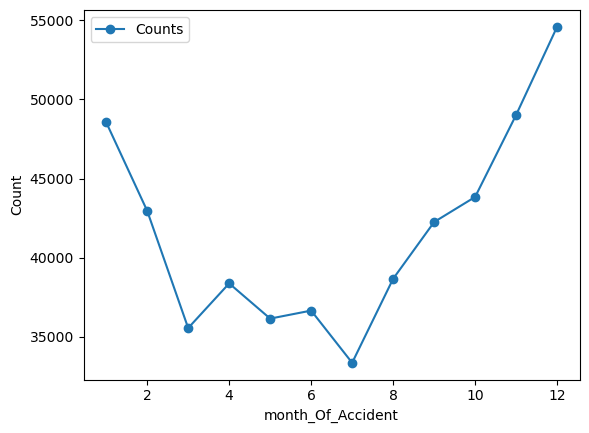

In [66]:
months_counts = df['months_of_accident'].value_counts().sort_index().reset_index(name='Counts')
months_counts
months_counts.columns = ['month_Of_Accident', 'Counts']
months_counts.plot(kind='line', x='month_Of_Accident', y='Counts', marker='o', ylabel='Count')


In [67]:
df_new = df[['ID','Year_Of_Accident', 'months_of_accident','hour_of_Accident']]
df_new

,ID,Year_Of_Accident,months_of_accident,hour_of_Accident
0,A-2047758,2019,6,10
1,A-4694324,2022,12,23
2,A-5006183,2022,8,13
3,A-4237356,2022,2,17
4,A-6690583,2020,12,1
...,...,...,...,...
499995,A-6077227,2021,12,7
499996,A-6323243,2021,12,16
499997,A-3789256,2022,4,19
499998,A-7030381,2020,5,17


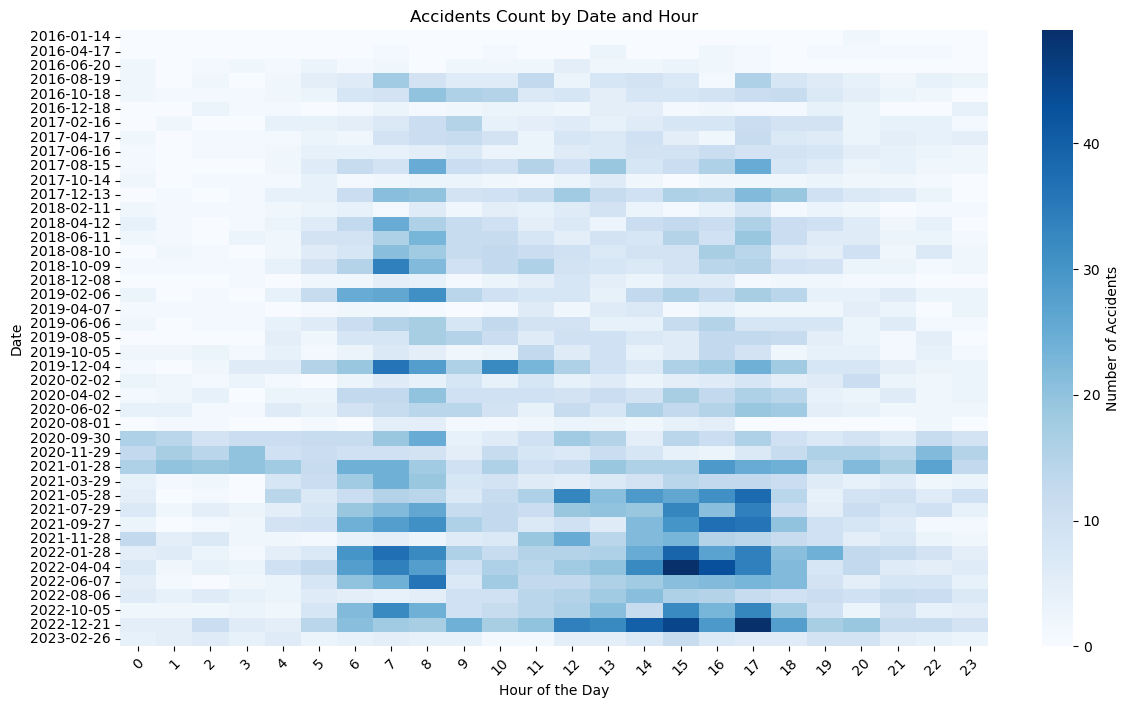

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 df 是包含事故数据的 DataFrame
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')  # 确保时间列是正确的 datetime 类型

# 提取日期（年月日）和小时信息
df['Date'] = df['Start_Time'].dt.date
df['Hour'] = df['Start_Time'].dt.hour

# 统计每个日期和小时的事故数量
accident_counts_by_hour = df.groupby(['Date', 'Hour']).size().unstack(fill_value=0)

# 选择每隔5天显示一次日期（例如，你可以调整间隔的天数）
interval = 60  # 每隔5天显示一个日期
dates_to_display = accident_counts_by_hour.index[::interval]  # 选择每隔5天的日期

# 创建热力图
plt.figure(figsize=(14, 8))
sns.heatmap(accident_counts_by_hour.loc[dates_to_display], cmap='Blues', cbar_kws={'label': 'Number of Accidents'}, annot=False, fmt='d')

# 设置标题和标签
plt.title('Accidents Count by Date and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# 显示图表
plt.show()
